In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [55]:
wkdir = '/projects/trans_scratch/validations/optitype/optitype_validation_wkdir/optitype/allele_count_test/'

In [4]:
f = '{}coverage_files.txt'.format(wkdir)
df = pd.read_csv(f, header=None)
df.columns = ['cov_files']
df.head(2)

,cov_files
0,/projects/trans_scratch/validations/optitype/o...
1,/projects/trans_scratch/validations/optitype/o...


,mismatch_mispaired_shared,mismatch_mispaired_unique,mismatch_paired_shared,mismatch_paired_unique,mismatch_unpaired_shared,mismatch_unpaired_unique,perfect_mispaired_shared,perfect_mispaired_unique,perfect_paired_shared,perfect_paired_unique,perfect_unpaired_shared,perfect_unpaired_unique
0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0


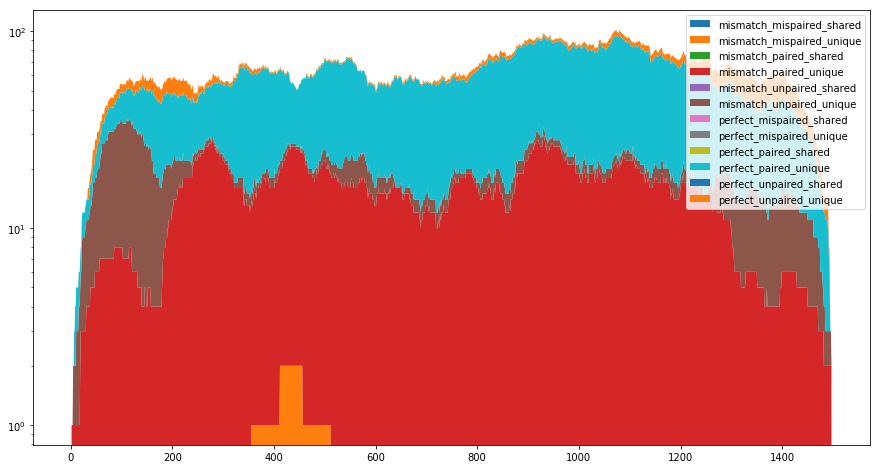

In [89]:
from operator import itemgetter 

stats = []
for ix, row in df.iterrows():
    
    f2 = row['cov_files']
    pog, lib, allele = itemgetter(*[8,11,12])( f2.split('/'))
    df2 = pd.read_csv(f2, sep='\t', index_col=0)
#     allele_len = df2.shape[0]
#     total = df2.sum(axis=1).sum()
#     average_cov = total/allele_len
#     peak_cov = df2.sum(axis=1).max()
#     perfect_unique_total_ratio = df2.perfect_paired_unique.sum()/total
#     stats.append([pog, lib, allele, average_cov, peak_cov, perfect_unique_total_ratio])
#     stats
#     df
#     plt.plot(df2.sum(axis=1))
    df2.head(2)
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)
#     ax.plot(df2)#.perfect_paired_unique)
    ax.stackplot(df2.index + 1, df2.values.T)
    _ = ax.set_yscale("log")
    ax.legend(df2.columns.values)
    break


In [75]:
df2.head()

,mismatch_mispaired_shared,mismatch_mispaired_unique,mismatch_paired_shared,mismatch_paired_unique,mismatch_unpaired_shared,mismatch_unpaired_unique,perfect_mispaired_shared,perfect_mispaired_unique,perfect_paired_shared,perfect_paired_unique,perfect_unpaired_shared,perfect_unpaired_unique
0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0
2,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0
3,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0
4,0.0,0,0.0,1,0.0,1,0.0,0,0.0,0,0.0,0


In [76]:
df2.index + 1

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498],
           dtype='int64', length=1498)

In [87]:
df2.values.T.shape

(12, 1498)

In [50]:

df3 = pd.DataFrame(stats, columns=['pog', 'lib', 'allele', 'average_cov', 'peak_cov', 'perfect_paired_unique_total_cov_ratio'])

In [52]:
df3.head(2)

,pog,lib,allele,average_cov,peak_cov,perfect_paired_unique_total_cov_ratio
0,POG011,A10945,HLA00050_coverage.txt,63.174232,102.0,0.612606
1,POG011,A10945,HLA00132_coverage.txt,31.076923,51.5,0.502174


In [60]:
df3['allele'] = df3.allele.apply(lambda x: x.split('_')[0])

In [61]:
df3.head(2)

,pog,lib,allele,average_cov,peak_cov,perfect_paired_unique_total_cov_ratio
0,POG011,A10945,HLA00050,63.174232,102.0,0.612606
1,POG011,A10945,HLA00132,31.076923,51.5,0.502174


In [57]:
f4 = '{}hla_ids_allele_map_no_intron.txt'.format(wkdir)
df4 = pd.read_csv(f4, sep='\t', header=None)
df4.columns = ['ids', 'hla_names']
df4.head(2)

,ids,hla_names
0,HLA00001,HLA-A*01:01:01:01
1,HLA00002,HLA-A*01:02


In [62]:
df5 = pd.merge(df3, df4, left_on='allele', right_on='ids', how='left')

In [69]:
df5.head(3)

,pog,lib,allele,average_cov,peak_cov,perfect_paired_unique_total_cov_ratio,ids,hla_names
0,POG011,A10945,HLA00050,63.174232,102.0,0.612606,HLA00050,HLA-A*24:02:01:01
1,POG011,A10945,HLA00132,31.076923,51.5,0.502174,HLA00132,HLA-B*07:02:01
2,POG011,A10945,HLA00170,28.201737,50.0,0.502392,HLA00170,HLA-B*15:07:01


In [67]:
df5.hla_names.isnull().any()

False

In [68]:
f6 = '{}optitype_test_cases.csv'.format(wkdir)
df6 = pd.read_csv(f6, sep='\t')
df6.head(2)

,POG_ID,HLA-A,HLA-B,HLA-C,Discrepant,est_TC,Biopsy_fix
0,POG517,NLOH,HET,HET,No,27,OCT
1,POG890,BCNA,HET,HET,No,29,FF


In [70]:
df7 = pd.merge(df5, df6, left_on='pog', right_on='POG_ID', how='left')

In [90]:
df7.head()

,pog,lib,allele,average_cov,peak_cov,perfect_paired_unique_total_cov_ratio,ids,hla_names,POG_ID,HLA-A,HLA-B,HLA-C,Discrepant,est_TC,Biopsy_fix
0,POG011,A10945,HLA00050,63.174232,102.0,0.612606,HLA00050,HLA-A*24:02:01:01,POG011,HET,HET,HET,No,30,OCT?
1,POG011,A10945,HLA00132,31.076923,51.5,0.502174,HLA00132,HLA-B*07:02:01,POG011,HET,HET,HET,No,30,OCT?
2,POG011,A10945,HLA00170,28.201737,50.0,0.502392,HLA00170,HLA-B*15:07:01,POG011,HET,HET,HET,No,30,OCT?
3,POG011,A10945,HLA00411,31.904636,47.0,0.563953,HLA00411,HLA-C*03:03:01,POG011,HET,HET,HET,No,30,OCT?
4,POG011,A10945,HLA01902,33.800000,64.0,0.595661,HLA01902,HLA-C*07:02:01:03,POG011,HET,HET,HET,No,30,OCT?


In [72]:
of = '{}pog_allele_coverage_counts_stats.txt'.format(wkdir)
df7.to_csv(of, sep='\t', index=False)

In [304]:
# df7.query('"HLA-A" == "{}"'.format('HET'))
allele = 'HLA-A'
loh = "HET"
stat = 'perfect_paired_unique_total_cov_ratio'
dftmp = df7[(df7[allele] == loh)&(df7['hla_names'].str.contains(allele))][['pog', 'lib', stat]]
dftmp['pog_lib'] = dftmp.pog + "_" + dftmp.lib
hues = []

In [305]:
pogs = dftmp.sort_values('pog_lib')['pog_lib'].unique()

num_alleles = [[i, dftmp.pog_lib.value_counts().loc[i]] for i in pogs]

In [307]:
def assign_groups(num_alleles):
    hues = []
    for v in num_alleles:
        for x in range(v[1]):
            hues.append([v[0], x+1])


    hues = pd.DataFrame(hues, columns=['pog_lib', 'allele'])
    return hues

In [308]:
hues = assign_groups(num_alleles)

assert (dftmp.reset_index().pog_lib == hues.reset_index().pog_lib).all()

dftmp['allele'] = hues.allele.tolist()

Text(0.5,1,'HLA-A_HET_perfect_paired_unique_total_cov_ratio')

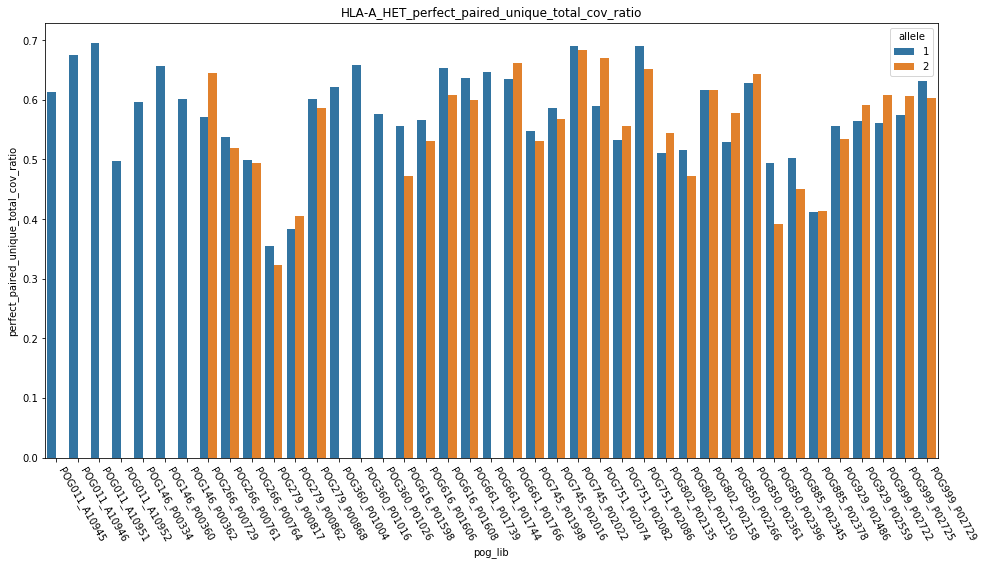

In [311]:
# .plot(kind='bar')
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
sns.barplot(x='pog_lib', y=stat,  data=dftmp, hue='allele', ax=ax)
xticklabels = ax.get_xticklabels()
_ = ax.set_xticklabels(xticklabels, rotation=-60, horizontalalignment='left')
ax.set_title('{0}_{1}_{2}'.format(allele, loh, stat))
of = '{0}{1}_{2}_{3}.png'.format(wkdir, allele, loh, stat)

plt.savefig(of, dpi=200, bbox_inches='tight')

In [329]:
# df7.query('"HLA-A" == "{}"'.format('HET'))
allele = 'HLA-A'
loh = "DLOH"
stat = ['average_cov', 'perfect_paired_unique_total_cov_ratio']
dftmp = df7[(df7[allele] == loh)&(df7['hla_names'].str.contains(allele))][['pog', 'lib'] + stat]
dftmp['pog_lib'] = dftmp.pog + "_" + dftmp.lib
pogs = dftmp.sort_values('pog_lib')['pog_lib'].unique()

num_alleles = [[i, dftmp.pog_lib.value_counts().loc[i]] for i in pogs]
hues = assign_groups(num_alleles)

assert (dftmp.reset_index().pog_lib == hues.reset_index().pog_lib).all()

dftmp['allele'] = hues.allele.tolist()

In [331]:
dftmp.head(2)

,pog,lib,average_cov,perfect_paired_unique_total_cov_ratio,pog_lib,allele
20,POG1022,P02827,16.993088,0.566586,POG1022_P02827,1
21,POG1022,P02827,51.390718,0.637310,POG1022_P02827,2


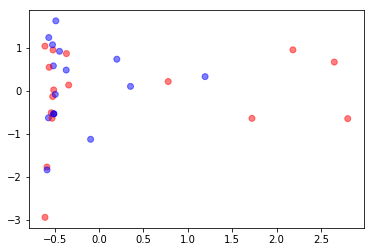

In [332]:
colors = {1:'red', 2:'blue'}
x = (dftmp['average_cov']- dftmp['average_cov'].mean())/dftmp['average_cov'].std()
y = (dftmp['perfect_paired_unique_total_cov_ratio'] - dftmp['perfect_paired_unique_total_cov_ratio'].mean())/dftmp['perfect_paired_unique_total_cov_ratio'].std()
plt.scatter(x, y, alpha=0.5, c=[colors[i] for i in dftmp.allele])

In [324]:
x

20    -0.539485
21    -0.370430
26    -0.513399
27    -0.515017
32     0.779046
33     1.194955
68    -0.562666
69    -0.570380
74    -0.609752
75    -0.487361
79    -0.609325
80    -0.445874
85    -0.522648
88     2.802664
118   -0.587450
119   -0.586217
124   -0.529576
125   -0.566781
130    2.651132
135    0.354276
292   -0.511386
293   -0.508828
298   -0.342493
299   -0.493582
304    2.184861
305    0.200274
484   -0.368007
485   -0.511173
490    1.723141
491   -0.095345
496   -0.518663
497   -0.524510
Name: average_cov, dtype: float64

# HLA typing for RNAseq data, outdated now, use the optitype_setup.py instead

In [ ]:
import os
import pandas as pd
from jinja2 import Environment, FileSystemLoader

In [1]:
def populate_sh_template(template_dir, patient, library, sh_script, fq1, fq2):
    jinja2_env = Environment(loader=FileSystemLoader([template_dir]),
                             trim_blocks=True)
    template = jinja2_env.get_template('optitype_template.sh')
    with open(sh_script, 'w') as opf:
        content = template.render(sh_script=sh_script,
                                  patient=patient,
                                  library=library,
                                  fq1=fq1,
                                  fq2=fq2)
        opf.write(content)
        print('templated {}'.format(sh_script))
    return sh_script

In [3]:
# f = '/projects/trans_scratch/validations/optitype/POGs/19_pog_rna_fastqs.csv'
f = '/projects/trans_scratch/validations/optitype/rna_slurm/5_POGs_DNA_BBT.txt.csv'
df_patient = pd.read_csv(f, sep='\t')
df_patient.head(2)

,patient,library,data_type,fastq1,fastq2
0,POG894,P02366,DNA,/projects/trans_scratch/validations/BBT/hla_te...,/projects/trans_scratch/validations/BBT/hla_te...
1,POG894,P02370,DNA,/projects/trans_scratch/validations/BBT/hla_te...,/projects/trans_scratch/validations/BBT/hla_te...


In [11]:
template_dir = '/home/szong/projects/development/optitype'
# fq_dir = '/projects/trans_scratch/validations/MiXCR/fastqs/'
# wkdir = os.getcwd()
# wkdir = '/projects/trans_scratch/validations/optitype/POGs/'
wkdir = '/projects/trans_scratch/validations/optitype/rna_slurm/POG_BBT/DNA'
for index, row in df_patient.iterrows():
    patient = row.patient
    library = row.rna_library
    fq1 = row.fastq1
    fq2 = row.fastq2
    sh_script = '.'.join([patient, library, 'optipye', 'sh'])
    sh_script = ''.join([wkdir, sh_script])
    populate_sh_template(template_dir, patient, library, sh_script, fq1, fq2);

templated /projects/trans_scratch/validations/optitype/POGs/POG083.P00134.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG108.P00207.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG116.P00255.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG114.P00257.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG165.P00447.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG217.P00676.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG237.P00688.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG264.P00777.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG280.P00865.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG279.P00868.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG318.P00881.optipye.sh
templated /projects/trans_scratch/validations/optitype/POGs/POG32